In [4]:
import pandas as pd


data = pd.read_excel('combined_original_new_data.xlsx', index_col=None)

# Display the first few rows of the DataFrame
data.head()


,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title
0,104,Unknown,Hispanic or Latino,Male,"Synovial sarcoma, NOS","Connective, subcutaneous and other soft tissue...",5840,Alive,9079,Not Reported,Genomic Analysis in Pediatric Malignancies
1,106,Unknown,Not Hispanic or Latino,Female,Chondroblastic osteosarcoma,Long bones of lower limb and associated joints,5110,Dead,7253,Not Reported,Genomic Analysis in Pediatric Malignancies
2,107,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,6205,Alive,8787,Not Reported,Genomic Analysis in Pediatric Malignancies
3,128,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS","Lung, NOS",3650,Dead,4030,Not Reported,Genomic Analysis in Pediatric Malignancies
4,152,Black or African American,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,4015,Dead,4526,Not Reported,Genomic Analysis in Pediatric Malignancies


In [5]:
# Count the number of unique participants in the merged dataset

# Pediatric age limit 21 years converted to days 7665
#Age at Diagnosis (days) < 7665
# Filter the data for "Age at Diagnosis (days)" > 7665
data = data[data['Age at Diagnosis (days)'] < 7665]
participant_count = data['Participant Id'].nunique()

# Display the results
print(f'Number of unique participants: {participant_count}')
#print(stats)

Number of unique participants: 8902


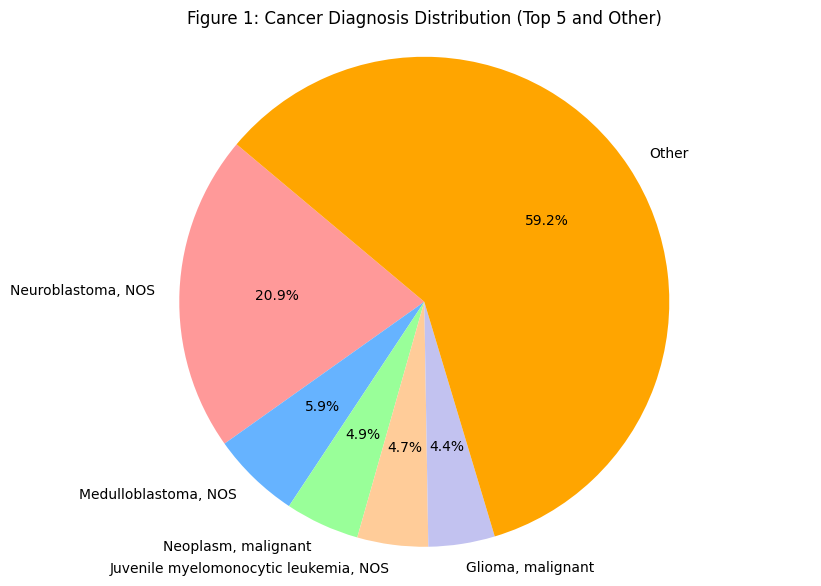

In [6]:
import matplotlib.pyplot as plt

# Grouping the diagnosis data to identify the top 5 diagnoses
top_5_diagnoses = data['Diagnosis'].value_counts().nlargest(5)
other_diagnoses_count = data['Diagnosis'].value_counts().sum() - top_5_diagnoses.sum()

# Creating the data for the pie chart
labels = list(top_5_diagnoses.index) + ['Other']
sizes = list(top_5_diagnoses.values) + [other_diagnoses_count]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', 'orange']  # Last color is for 'Other'

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Figure 1: Cancer Diagnosis Distribution (Top 5 and Other)')
plt.show()



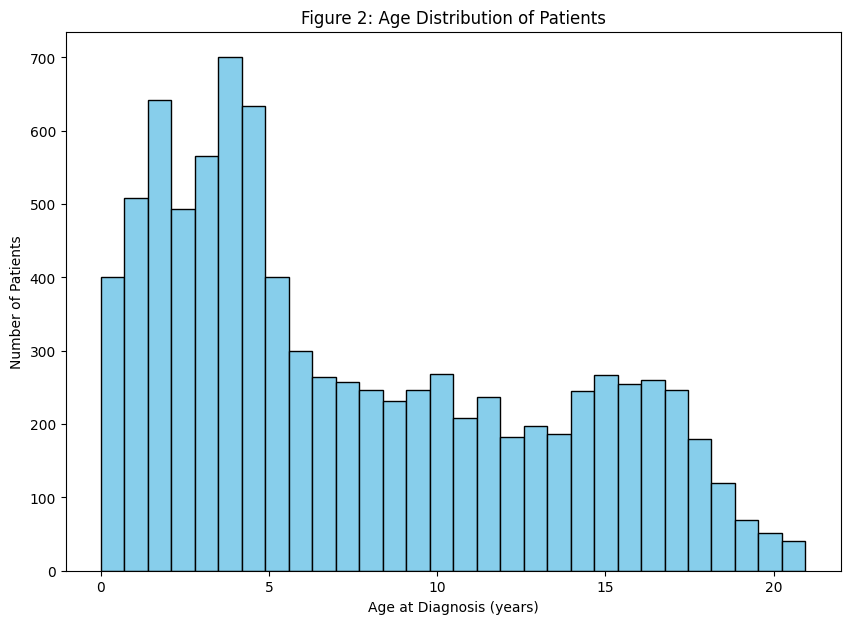

In [7]:
# Convert 'Age at Diagnosis (days)' to numeric and remove any non-numeric entries (like errors or non-reported values)
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop NaN values in 'Age at Diagnosis (days)'
age_data = data['Age at Diagnosis (days)'].dropna()

# Convert age from days to years for better interpretability
age_data_years = age_data / 365.25

# Plotting the histogram
plt.figure(figsize=(10, 7))
plt.hist(age_data_years, bins=30, color='skyblue', edgecolor='black')
plt.title('Figure 2: Age Distribution of Patients')
plt.xlabel('Age at Diagnosis (years)')
plt.ylabel('Number of Patients')
plt.show()


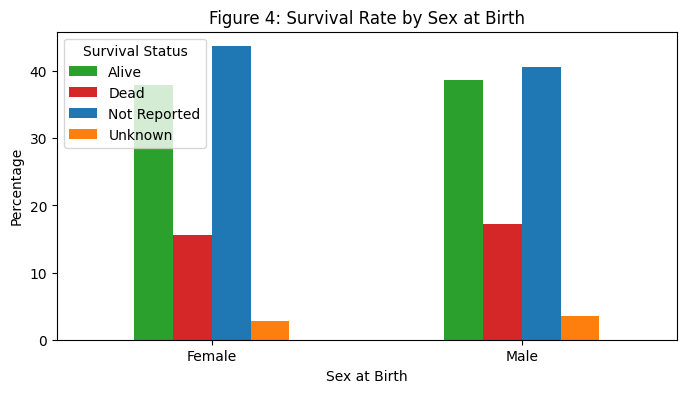

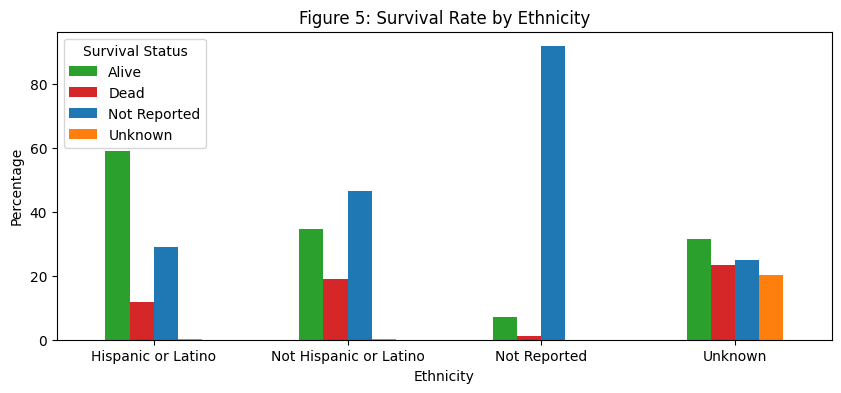

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'data' DataFrame

# Survival Rate by Sex at Birth
survival_by_sex = data.groupby(['Sex at Birth', 'Last Known Survival Status']).size().unstack()
survival_rates_by_sex = (survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0) * 100).fillna(0)

# Plot Figure 4: Survival Rate by Sex at Birth with distinct colors for each status
ax1 = survival_rates_by_sex.plot(kind='bar', stacked=False, color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(8, 4))
plt.title('Figure 4: Survival Rate by Sex at Birth')
plt.xlabel('Sex at Birth')
plt.ylabel('Percentage')
plt.xticks(rotation=0, ha='center', wrap=True)
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

# Survival Rate by Ethnicity
survival_by_ethnicity = data.groupby(['Ethnicity', 'Last Known Survival Status']).size().unstack()
survival_rates_by_ethnicity = (survival_by_ethnicity.div(survival_by_ethnicity.sum(axis=1), axis=0) * 100).fillna(0)

# Plot Figure 5: Survival Rate by Ethnicity with distinct colors for each status
ax2 = survival_rates_by_ethnicity.plot(kind='bar', stacked=False, color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 4))
plt.title('Figure 5: Survival Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=0, ha='center', wrap=True)
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(0, 1))
plt.show()





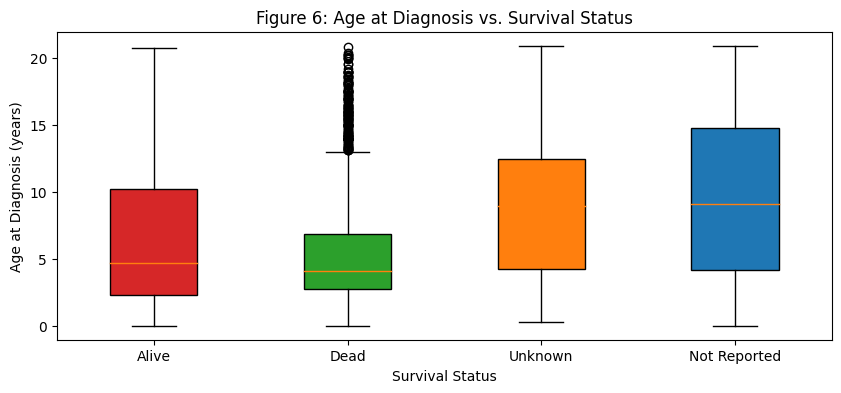

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Preparing the data for Age at Diagnosis vs. Survival Status
age_vs_survival = data[['Age at Diagnosis (days)', 'Last Known Survival Status']].dropna()

# Convert age from days to years
age_vs_survival['Age at Diagnosis (years)'] = age_vs_survival['Age at Diagnosis (days)'] / 365.25

# Define colors for each survival status
colors = [ '#d62728', '#2ca02c', '#ff7f0e','#1f77b4']

# Get the unique survival statuses
statuses = age_vs_survival['Last Known Survival Status'].unique()

# Create a boxplot with distinct colors for each survival status
plt.figure(figsize=(10, 4))
box = plt.boxplot(
    [age_vs_survival[age_vs_survival['Last Known Survival Status'] == status]['Age at Diagnosis (years)'] for status in statuses],
    labels=statuses,
    patch_artist=True
)

# Apply colors to the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Figure 6: Age at Diagnosis vs. Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Age at Diagnosis (years)')
plt.show()





In [11]:
# Count participants by Last Known Survival Status
survival_status_count = data['Last Known Survival Status'].value_counts()

print(survival_status_count)

Last Known Survival Status
Not Reported    3795
Alive           3484
Dead            1528
Unknown          377
Name: count, dtype: int64


In [12]:
# save a copy of df
import pandas as pd

# Load the dataset
# file_path = 'combined_original_new_data.xlsx'
# data = pd.read_excel(file_path)


# Save the dataset after dropping the columns
data.to_csv('data_after_column_drop.csv', index=False)




Correlation Matrix:
                                    Age at Last Known Survival Status  \
Age at Last Known Survival Status                           1.000000   
Last Known Survival Status                                  0.188128   

                                   Last Known Survival Status  
Age at Last Known Survival Status                    0.188128  
Last Known Survival Status                           1.000000  


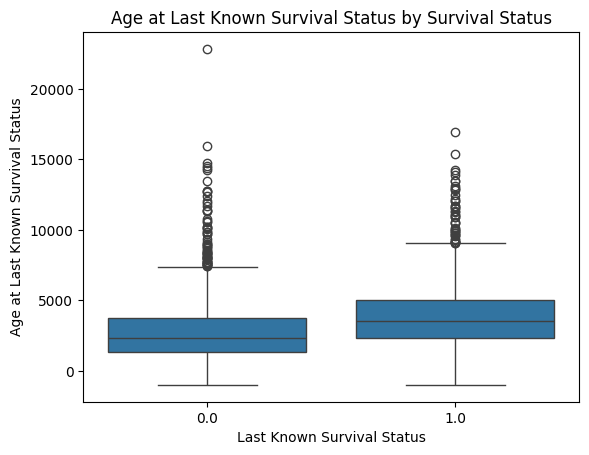

In [22]:
# Run correlation analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'data_after_column_drop.csv'
data = pd.read_csv(file_path)

# Convert 'Last Known Survival Status' to numerical values for correlation
data['Last Known Survival Status'] = data['Last Known Survival Status'].map({
    'Alive': 1,
    'Dead': 0,
    'Unknown': None
})

# Drop rows with NaN values for correlation analysis
cleaned_data = data.dropna(subset=['Age at Last Known Survival Status', 'Last Known Survival Status'])

# Calculate correlation
correlation = cleaned_data[['Age at Last Known Survival Status', 'Last Known Survival Status']].corr()

print("Correlation Matrix:\n", correlation)

# Visualize the relationship
sns.boxplot(x='Last Known Survival Status', y='Age at Last Known Survival Status', data=cleaned_data)
plt.title('Age at Last Known Survival Status by Survival Status')
plt.show()

In [ ]:
#The correlation between "Age at Last Known Survival Status" and "Last Known Survival Status" is 0.188.
#This value suggests a weak positive correlation. For the classification model we will drop this feature to avoid overfitting.

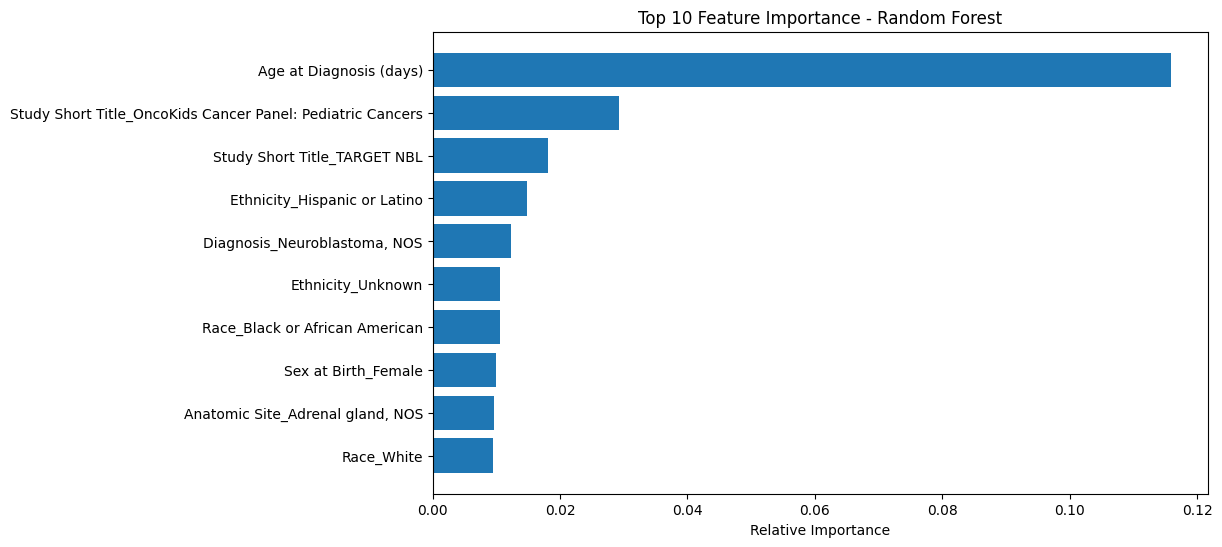

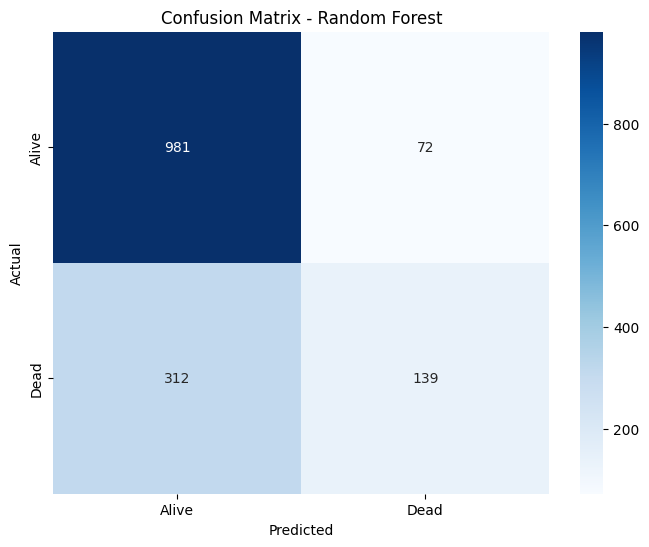

Top 10 Features by Importance:
Race_White: 0.00946874070966789
Anatomic Site_Adrenal gland, NOS: 0.009578621893167353
Sex at Birth_Female: 0.009891322050935234
Race_Black or African American: 0.010552999205974673
Ethnicity_Unknown: 0.010575640566831763
Diagnosis_Neuroblastoma, NOS: 0.012353822040940116
Ethnicity_Hispanic or Latino: 0.01474998853401859
Study Short Title_TARGET NBL: 0.018105161777606474
Study Short Title_OncoKids Cancer Panel: Pediatric Cancers: 0.029189873247492296
Age at Diagnosis (days): 0.11582546699823672


In [32]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data_after_column_drop.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)
data_lifelines = data.copy()
data = data.drop(columns=['Event-Free Survival Status','Age at Last Known Survival Status'])

# Define the target and features
target = 'Last Known Survival Status'
X = data.drop(columns=[target])
y = data[target]

# Clean the target data by removing rows with 'Not Reported', 'Unknown', or blanks
valid_statuses = ['Alive', 'Dead']
data_cleaned = data[data[target].isin(valid_statuses)]
data_lifelines =data_lifelines[data_lifelines[target].isin(valid_statuses)]

# Redefine X and y after cleaning
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

# Convert categorical target to numerical
y = y.map({'Alive': 0, 'Dead': 1})

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline to combine preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model using the pipeline
pipeline.fit(X_train, y_train)

# Predict the test set
y_pred = pipeline.predict(X_test)

# Feature importance is not directly accessible in the pipeline, so let's access it from the trained model
# after one-hot encoding
model = pipeline.named_steps['classifier']
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_feature_names])

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Output the top 10 feature names and their importance
top_10_features = [(all_feature_names[i], importances[i]) for i in indices]
print("Top 10 Features by Importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")


In [33]:
# Participant Count
participant_count = data_cleaned['Participant Id'].nunique()
print(f"Final Participant Count: {participant_count}")


Final Participant Count: 5012


In [34]:
# Model performance metrics

Accuracy: 0.7447
Precision: 0.6588
Recall: 0.3082
F1 Score: 0.4199
AUC-ROC: 0.7613


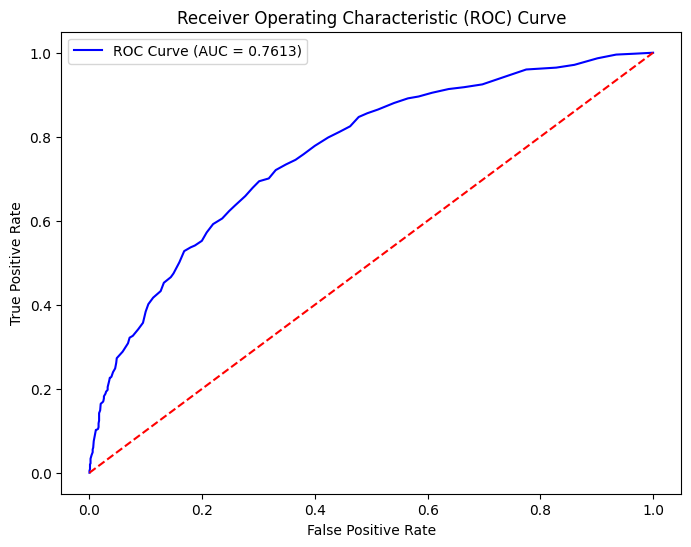

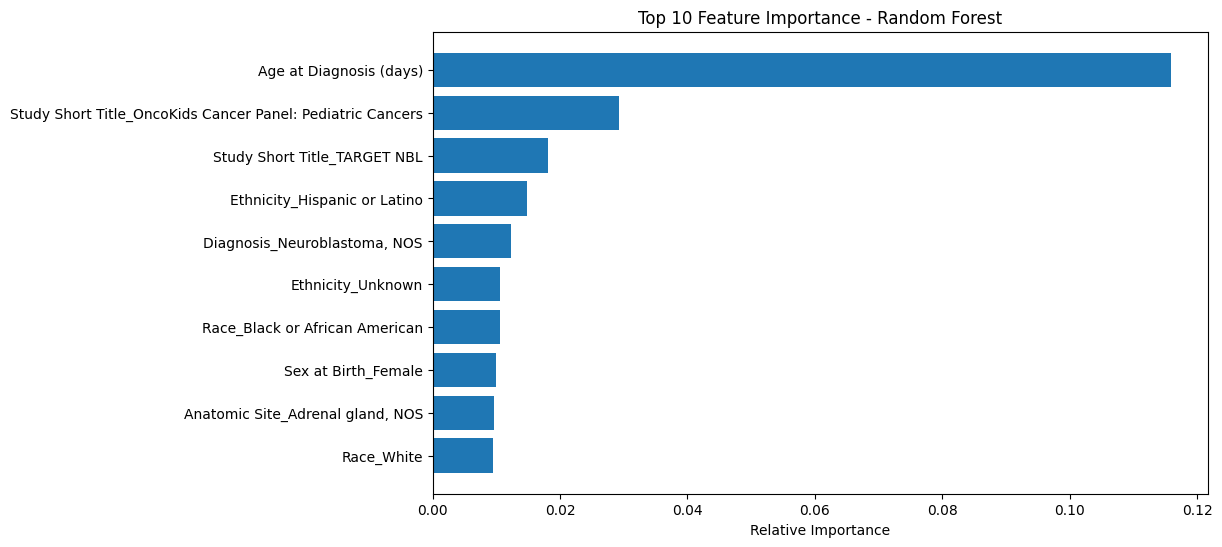

Top 10 Features by Importance:
Race_White: 0.00946874070966789
Anatomic Site_Adrenal gland, NOS: 0.009578621893167353
Sex at Birth_Female: 0.009891322050935234
Race_Black or African American: 0.010552999205974673
Ethnicity_Unknown: 0.010575640566831763
Diagnosis_Neuroblastoma, NOS: 0.012353822040940116
Ethnicity_Hispanic or Latino: 0.01474998853401859
Study Short Title_TARGET NBL: 0.018105161777606474
Study Short Title_OncoKids Cancer Panel: Pediatric Cancers: 0.029189873247492296
Age at Diagnosis (days): 0.11582546699823672


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

# Predict the test set
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature importance is not directly accessible in the pipeline, so let's access it from the trained model
# after one-hot encoding
model = pipeline.named_steps['classifier']
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_feature_names])

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.show()

# Output the top 10 feature names and their importance
top_10_features = [(all_feature_names[i], importances[i]) for i in indices]
print("Top 10 Features by Importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

In [36]:
data_lifelines.to_csv('data_lifelines.csv', index=False)

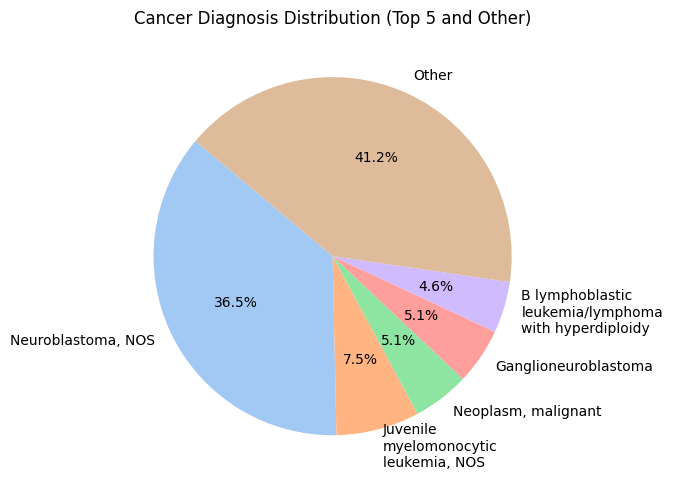

In [80]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the dataset
data = pd.read_csv('data_lifelines.csv')

# Convert Age at Diagnosis (days) to Age at Diagnosis (years)
data['Age at Diagnosis (years)'] = data['Age at Diagnosis (days)'] / 365.25

# Function to wrap labels
def wrap_labels(labels, width):
    wrapped_labels = []
    for label in labels:
        if isinstance(label, str):
            wrapped_labels.append(textwrap.fill(label, width))
        else:
            wrapped_labels.append(textwrap.fill(label.get_text(), width))
    return wrapped_labels

# Set general figure size
figure_size = (7, 5)  # Adjust the figure size to fit well in a Word document

# Figure 1: Cancer Diagnosis Distribution (Top 5 and Other) - Pie Chart
top_diagnoses = data['Diagnosis'].value_counts().nlargest(5)
other_diagnoses = data['Diagnosis'].value_counts().sum() - top_diagnoses.sum()
fig1_data = pd.concat([top_diagnoses, pd.Series({'Other': other_diagnoses})])

plt.figure(figsize=figure_size)
labels = wrap_labels(fig1_data.index, 20)  # Wrap labels if they are too long
fig1_data.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140, labels=labels)
plt.ylabel('')
plt.title('Cancer Diagnosis Distribution (Top 5 and Other)', fontsize=12)
plt.tight_layout()
plt.savefig('figure_1.png', dpi=300)  # Save with high resolution for publication
plt.show()





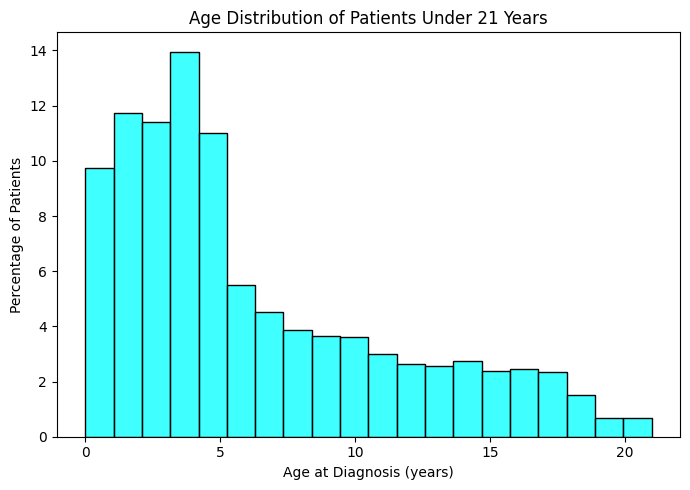

In [99]:

# Filter the data to include only patients under 21 years
data_under_21 = data[data['Age at Diagnosis (years)'] <= 21]

# Calculate the total number of patients under 21 years
total_patients = len(data_under_21)

# Plot the histogram with the y-axis as the percentage of patients
plt.figure(figsize=figure_size)
sns.histplot(data_under_21['Age at Diagnosis (years)'], kde=False, color='cyan', bins=20, stat='percent')

# Add title and labels
plt.title('Age Distribution of Patients Under 21 Years', fontsize=12)
plt.xlabel('Age at Diagnosis (years)')
plt.ylabel('Percentage of Patients')

# Improve layout and save the figure
plt.tight_layout()
plt.savefig('figure_2.png', dpi=300)  # Save with high resolution for publication
plt.show()



<Figure size 700x500 with 0 Axes>

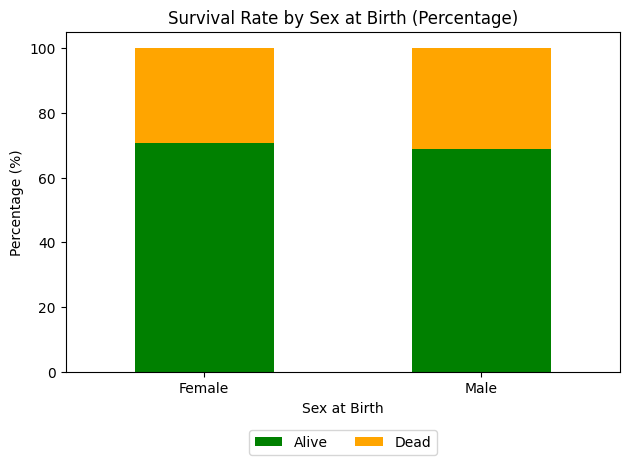

In [95]:

# Figure 4: Survival Rate by Sex at Birth (Normalized to Percentage)
plt.figure(figsize=figure_size)
survival_by_sex = data.groupby('Sex at Birth')['Last Known Survival Status'].value_counts(normalize=True).unstack() * 100
ax = survival_by_sex.plot(kind='bar', stacked=True, color=['green', 'orange', 'blue'])
wrapped_labels = wrap_labels(ax.get_xticklabels(), 10)  # Wrap x-axis labels
ax.set_xticklabels(wrapped_labels)
plt.title('Survival Rate by Sex at Birth (Percentage)', fontsize=12)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Position legend below with two rows if needed
plt.tight_layout()
plt.savefig('figure_4.png', dpi=300)  # Save with high resolution for publication
plt.show()



<Figure size 700x500 with 0 Axes>

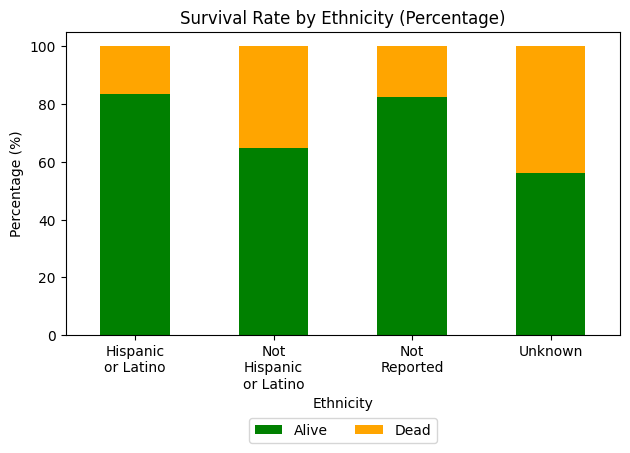

In [104]:

# Figure 5.a: Survival Rate by Ethnicity (Normalized to Percentage)
plt.figure(figsize=figure_size)
survival_by_ethnicity = data.groupby('Ethnicity')['Last Known Survival Status'].value_counts(normalize=True).unstack() * 100
ax = survival_by_ethnicity.plot(kind='bar', stacked=True, color=['green', 'orange', 'gray'])
wrapped_labels = wrap_labels(ax.get_xticklabels(), 10)  # Wrap x-axis labels
ax.set_xticklabels(wrapped_labels)
plt.title('Survival Rate by Ethnicity (Percentage)', fontsize=12)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)  # Position legend below with two rows if needed
plt.tight_layout()
plt.savefig('figure_5_a.png', dpi=300)  # Save with high resolution for publication
plt.show()


<Figure size 700x500 with 0 Axes>

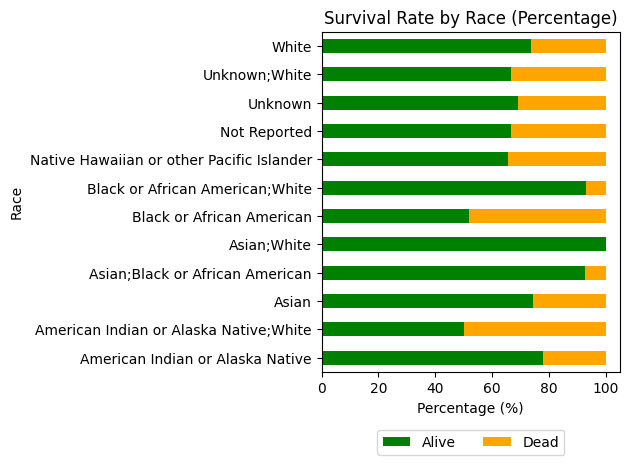

In [106]:
# Figure 5.b: Survival Rate by Ethnicity (Normalized to Percentage)
plt.figure(figsize=figure_size)

# Calculate the survival rate by ethnicity and normalize to percentage
survival_by_ethnicity = data.groupby('Race')['Last Known Survival Status'].value_counts(normalize=True).unstack() * 100

# Plot as a horizontal bar chart
ax = survival_by_ethnicity.plot(kind='barh', stacked=True, color=['green', 'orange', 'gray'])

# Set the title and labels
plt.title('Survival Rate by Race (Percentage)', fontsize=12)
plt.xlabel('Percentage (%)')
plt.ylabel('Race')

# Adjust legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Position legend below with two rows if needed

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('figure_5_b.png', dpi=300)  # Save with high resolution for publication
plt.show()

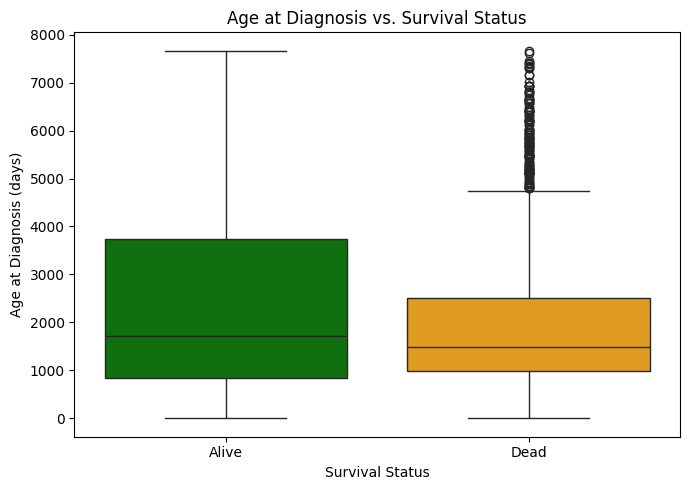

# Kaplan-Meier Survival Analysis

In [41]:
# Data Preprocessing for KaplanMeierFitter, CoxPHFitter
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt


# Preprocessing: Encode categorical variables and handle missing values
data_encoded = pd.get_dummies(data_lifelines, drop_first=True)
data_encoded = data_encoded.dropna()

# Ensure the necessary columns exist and are clean
# Here we assume that 'Last Known Survival Status' contains 'Dead' for events and other values for censored data.
# 'Age at Last Known Survival Status' will be used as the duration.

# Prepare the survival data
data_lifelines['event'] = data_lifelines['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)
data_lifelines['duration'] = data_lifelines['Age at Last Known Survival Status']

# Drop any rows with missing survival data
survival_data = data_lifelines.dropna(subset=['duration', 'event'])



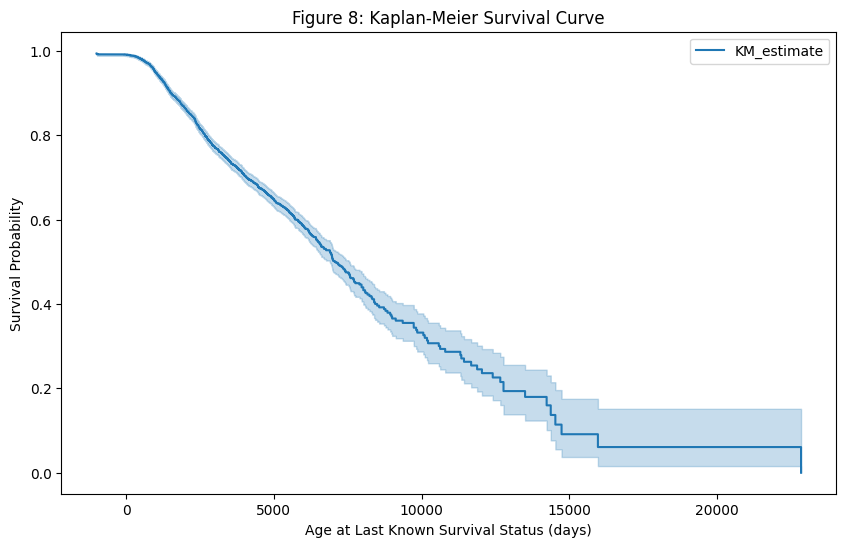

In [98]:
# Kaplan-Meier Survival Curve
# Kaplan-Meier overall survival curve
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
kmf.fit(durations=survival_data['duration'], event_observed=survival_data['event'])
kmf.plot_survival_function()
plt.title('Figure 8: Kaplan-Meier Survival Curve')
plt.xlabel('Age at Last Known Survival Status (days)')
plt.ylabel('Survival Probability')
plt.show()


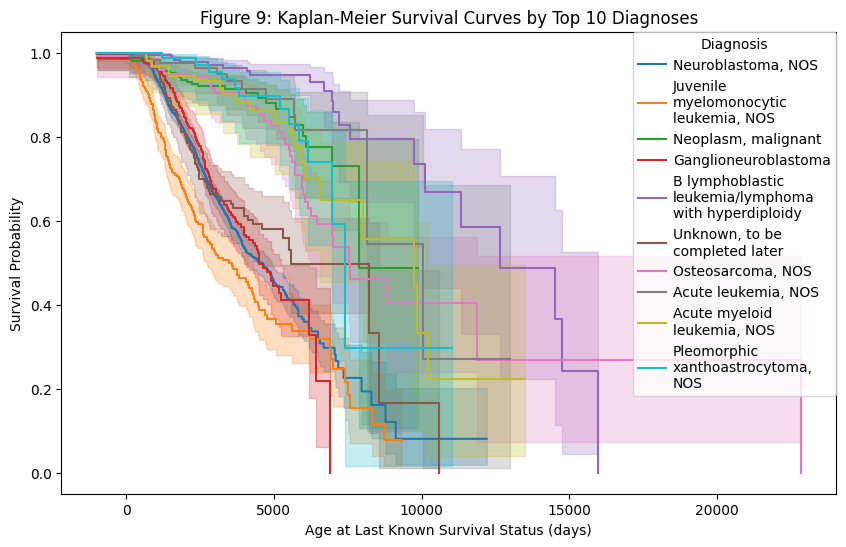

In [110]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import textwrap

# Identify the top 10 diagnoses
top_10_diagnoses = survival_data['Diagnosis'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))

kmf = KaplanMeierFitter()

for diagnosis in top_10_diagnoses:
    diagnosis_data = survival_data[survival_data['Diagnosis'] == diagnosis]
    kmf.fit(durations=diagnosis_data['duration'], event_observed=diagnosis_data['event'], label='\n'.join(textwrap.wrap(diagnosis, 20)))
    kmf.plot_survival_function()

plt.title('Figure 9: Kaplan-Meier Survival Curves by Top 10 Diagnoses')
plt.xlabel('Age at Last Known Survival Status (days)')
plt.ylabel('Survival Probability')
plt.legend(title='Diagnosis', loc='upper right', bbox_to_anchor=(1.0, 1), handletextpad=0.5, borderaxespad=0.)  # Adjust the legend position and size
plt.show()



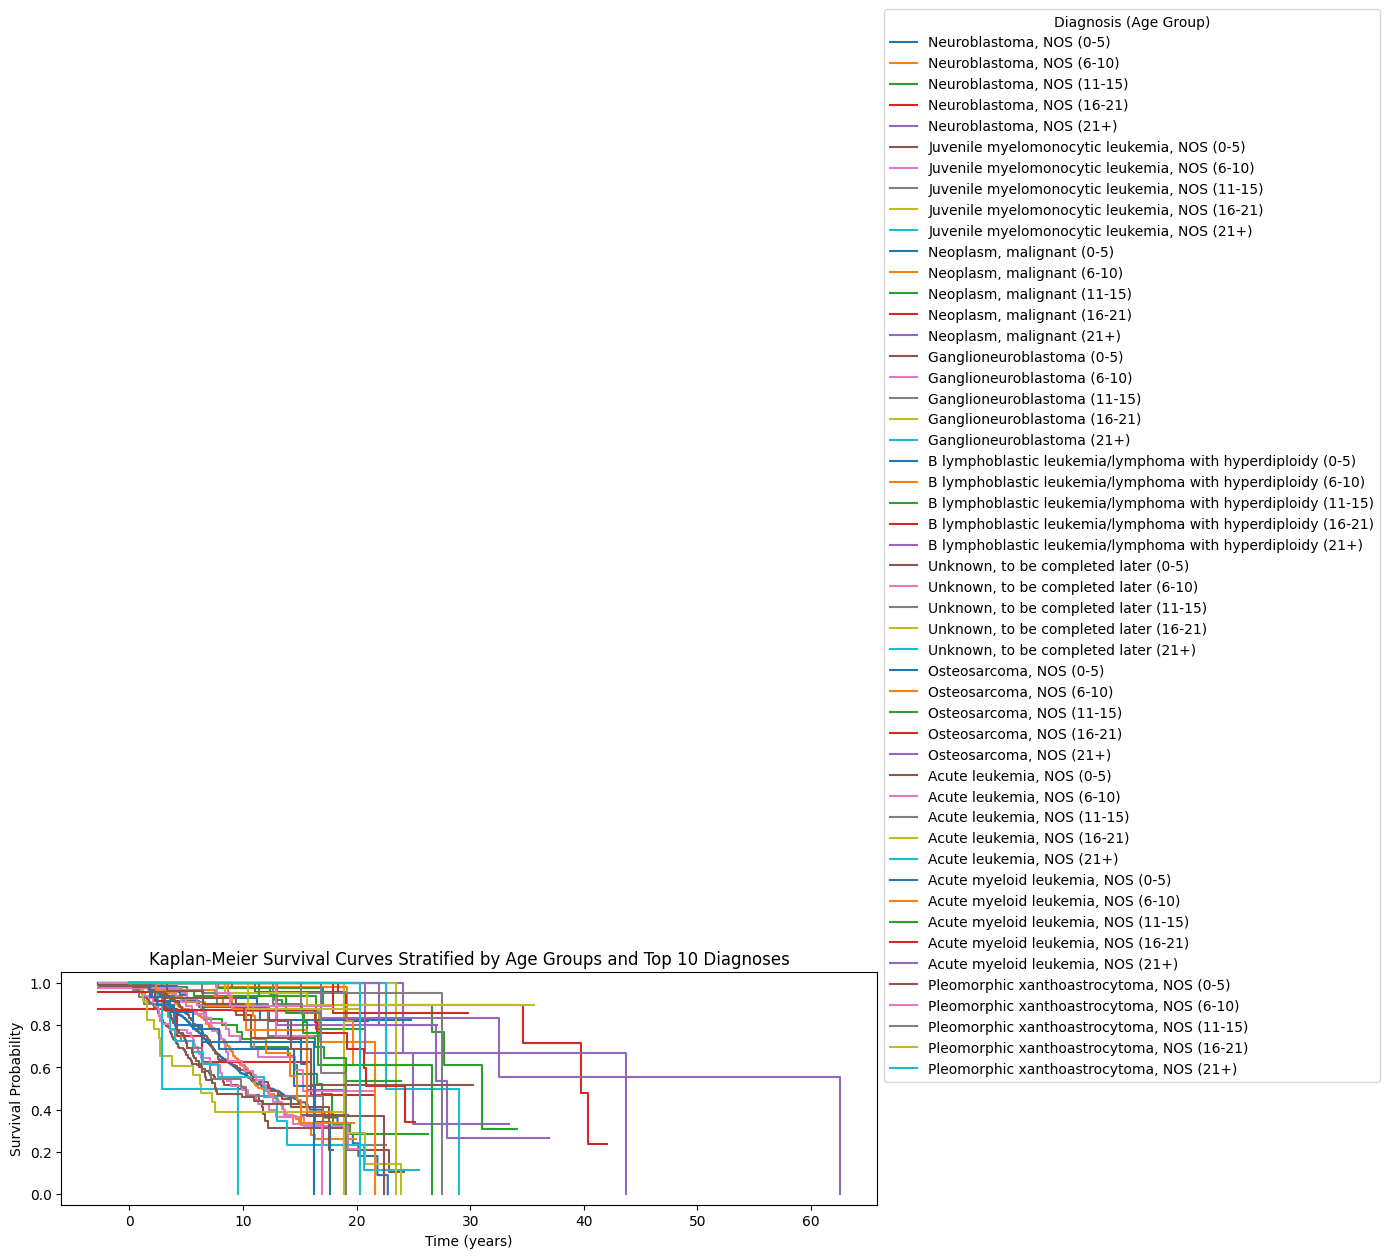

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming 'survival_data' is your DataFrame and it contains columns: 'Diagnosis', 'duration', 'event', and 'Age at Diagnosis (days)'

# Convert age from days to years (although your data is less than 21 years, this is more intuitive)
survival_data['age_at_diagnosis_years'] = survival_data['Age at Diagnosis (days)'] / 365.25

# Define age groups in 5-year intervals (e.g., 0-4, 5-9, 10-14, 15-19, 20+)
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '6-10', '11-15', '16-21', '21+']
survival_data['age_group'] = pd.cut(survival_data['age_at_diagnosis_years'], bins=bins, labels=labels, right=False)

# Identify the top 10 diagnoses
top_10_diagnoses = survival_data['Diagnosis'].value_counts().nlargest(10).index

# Initialize the plot
plt.figure(figsize=(14, 10))

# Create Kaplan-Meier Fitter instance
kmf = KaplanMeierFitter()

# Loop through each diagnosis and then each age group within that diagnosis
for diagnosis in top_10_diagnoses:
    diagnosis_data = survival_data[survival_data['Diagnosis'] == diagnosis]
    
    for age_group in labels:
        age_group_data = diagnosis_data[diagnosis_data['age_group'] == age_group]
        
        if len(age_group_data) > 0:  # Only plot if there are data points in this group
            kmf.fit(durations=age_group_data['duration'] / 365.25,  # Convert duration to years
                    event_observed=age_group_data['event'], 
                    label=f'{diagnosis} ({age_group})')
            kmf.plot_survival_function(ci_show=False)  # ci_show=False hides the confidence interval shading

# Set plot title and labels
plt.title('Kaplan-Meier Survival Curves Stratified by Age Groups and Top 10 Diagnoses')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.legend(title='Diagnosis (Age Group)', loc='lower left', bbox_to_anchor=(1.0, 0.5))  # Adjust legend location
plt.tight_layout()  # Adjusts the plot to make space for the legend
plt.show()


In [63]:
survival_data.head()

,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title,event,duration,age_at_diagnosis_years,age_group
0,104,Unknown,Hispanic or Latino,Male,"Synovial sarcoma, NOS","Connective, subcutaneous and other soft tissue...",5840,Alive,9079,Not Reported,Genomic Analysis in Pediatric Malignancies,0,9079,15.989049,15-19
1,106,Unknown,Not Hispanic or Latino,Female,Chondroblastic osteosarcoma,Long bones of lower limb and associated joints,5110,Dead,7253,Not Reported,Genomic Analysis in Pediatric Malignancies,1,7253,13.990418,10-14
2,107,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,6205,Alive,8787,Not Reported,Genomic Analysis in Pediatric Malignancies,0,8787,16.988364,15-19
3,128,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS","Lung, NOS",3650,Dead,4030,Not Reported,Genomic Analysis in Pediatric Malignancies,1,4030,9.993155,5-9
4,152,Black or African American,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,4015,Dead,4526,Not Reported,Genomic Analysis in Pediatric Malignancies,1,4526,10.992471,10-14


In [64]:
# Participant Count
participant_count = survival_data['Participant Id'].nunique()
print(f"Final Participant Count: {participant_count}")

Final Participant Count: 5012


## Cox Proportional Hazards model using the lifelines package.

In [65]:
import pandas as pd
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_csv('data_lifelines.csv')

# Convert columns to numeric, coercing errors to NaN
data['Age at Last Known Survival Status'] = pd.to_numeric(data['Age at Last Known Survival Status'], errors='coerce')
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop rows with NaN values that resulted from the coercion
data = data.dropna(subset=['Age at Last Known Survival Status', 'Age at Diagnosis (days)'])

# Convert 'Last Known Survival Status' to a binary event column: 1 for dead, 0 for alive
data['event'] = data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Calculate the survival time as the difference between age at last known status and age at diagnosis
data['duration'] = data['Age at Last Known Survival Status'] - data['Age at Diagnosis (days)']

# Selecting columns for the model
columns_for_model = ['duration', 'event', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site']

# Keep only necessary columns and drop any rows with missing values
cox_data = data[columns_for_model].dropna()

# Convert categorical variables to dummy/indicator variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Check Variance Inflation Factor (VIF) to detect multicollinearity
X = cox_data.drop(columns=['duration', 'event'])
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [66]:
vif['Feature'] = X.columns

# Display features with high VIF (greater than 10 indicates multicollinearity)
print(vif[vif['VIF'] > 10])

# You may choose to drop variables with high VIF
# Example: cox_data = cox_data.drop(columns=['some_high_vif_column'])

# Re-fit the Cox model with or without penalization
cph = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value based on needs, remove penalizer if not needed
cph.fit(cox_data, duration_col='duration', event_col='event')

# Display the summary of the model
print(cph.summary)

     VIF                                            Feature
92   inf                   Diagnosis_Fibrillary astrocytoma
127  inf                  Diagnosis_Malignant histiocytosis
185  inf  Diagnosis_Precursor B-cell lymphoblastic leukemia
240  inf                                Anatomic Site_Cecum
270  inf                          Anatomic Site_Hard palate
336  inf                       Anatomic Site_Prostate gland
                                                 coef  exp(coef)  se(coef)  \
covariate                                                                    
Race_American Indian or Alaska Native;White  2.351505  10.501364  1.325231   
Race_Asian                                  -0.097277   0.907304  0.101369   
Race_Asian;Black or African American        -0.622917   0.536378  0.588906   
Race_Asian;White                            -0.105259   0.900092  1.511422   
Race_Black or African American               0.329031   1.389621  0.076552   
...                               

In [67]:
# Interpretation of the Cox Proportional Hazards Model Results
import pandas as pd
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_csv('data_lifelines.csv')

# Convert columns to numeric, coercing errors to NaN
data['Age at Last Known Survival Status'] = pd.to_numeric(data['Age at Last Known Survival Status'], errors='coerce')
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop rows with NaN values that resulted from the coercion
data = data.dropna(subset=['Age at Last Known Survival Status', 'Age at Diagnosis (days)'])



In [68]:

# Convert 'Last Known Survival Status' to a binary event column: 1 for dead, 0 for alive
data['event'] = data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Calculate the survival time as the difference between age at last known status and age at diagnosis
data['duration'] = data['Age at Last Known Survival Status'] - data['Age at Diagnosis (days)']

# Selecting columns for the model
columns_for_model = ['duration', 'event', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site']

# Keep only necessary columns and drop any rows with missing values
cox_data = data[columns_for_model].dropna()

# Convert categorical variables to dummy/indicator variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Check Variance Inflation Factor (VIF) to detect multicollinearity
X = cox_data.drop(columns=['duration', 'event'])
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

# Display features with high VIF (greater than 10 indicates multicollinearity)
print(vif[vif['VIF'] > 10])

# You may choose to drop variables with high VIF
# Example: cox_data = cox_data.drop(columns=['some_high_vif_column'])

# Re-fit the Cox model with or without penalization
cph = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value based on needs, remove penalizer if not needed
cph.fit(cox_data, duration_col='duration', event_col='event')

# Display the summary of the model
print(cph.summary)

# To specifically extract hazard ratios and their CIs
hr_summary = cph.summary[['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%', 'p']]
print(hr_summary)

     VIF                                            Feature
92   inf                   Diagnosis_Fibrillary astrocytoma
127  inf                  Diagnosis_Malignant histiocytosis
185  inf  Diagnosis_Precursor B-cell lymphoblastic leukemia
240  inf                                Anatomic Site_Cecum
270  inf                          Anatomic Site_Hard palate
336  inf                       Anatomic Site_Prostate gland
                                                 coef  exp(coef)  se(coef)  \
covariate                                                                    
Race_American Indian or Alaska Native;White  2.351505  10.501364  1.325231   
Race_Asian                                  -0.097277   0.907304  0.101369   
Race_Asian;Black or African American        -0.622917   0.536378  0.588906   
Race_Asian;White                            -0.105259   0.900092  1.511422   
Race_Black or African American               0.329031   1.389621  0.076552   
...                               

In [69]:

# Cox Proportional Hazards Model for top 10 anatomic sites
cph = CoxPHFitter()
top_10_encoded_data = encoded_data[encoded_data['Anatomic Site'].isin(label_encoders['Anatomic Site'].transform(top_10_sites))]
cph.fit(top_10_encoded_data[['Age at Diagnosis (days)', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site', 'Age at Last Known Survival Status (days)', 'Event']], 
        duration_col='Age at Last Known Survival Status (days)', event_col='Event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5012 total observations, 3484 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5012
number of events observed = 1528
   partial log-likelihood = -11528.79
         time fit was run = 2024-08-31 23:11:42 UTC

---
                                                                                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                                                             
Race_American Indian or Alaska Native;White                                                     2.35      10.50       1.33            -0.25             4.95                 0.78               141.02
Race_Asian                                                                                     -0.10       0.91       0.10            -0.30             0.10                 0.74                 1.11
Race_Asian;Black or African American                                                           -0.62       0.54       0.59            -1.78             0.53                 0.17                 1.70
Race_Asian;White                                                                               -0.11       0.90       1.51            -3.07             2.86                 0.05                17.41
Race_Black or African American                                                                  0.33       1.39       0.08             0.18             0.48                 1.20                 1.61
Race_Black or African American;White                                                           -0.36       0.70       0.42            -1.19             0.47                 0.30                 1.60
Race_Native Hawaiian or other Pacific Islander                                                  0.03       1.03       0.28            -0.51             0.57                 0.60                 1.78
Race_Not Reported                                                                               0.69       1.99       0.48            -0.25             1.62                 0.78                 5.05
Race_Unknown                                                                                    0.04       1.04       0.07            -0.10             0.18                 0.91                 1.20
Race_Unknown;White                                                                              0.16       1.17       0.72            -1.25             1.56                 0.29                 4.77
Race_White                                                                                     -0.15       0.86       0.06            -0.28            -0.03                 0.76                 0.97
Ethnicity_Not Hispanic or Latino                                                                0.11       1.12       0.06            -0.00             0.22                 1.00                 1.25
Ethnicity_Not Reported                                                                          0.33       1.40       0.31            -0.27             0.94                 0.76                 2.57
Ethnicity_Unknown                                                                               0.52       1.68       0.08             0.37             0.67                 1.45                 1.95
Sex at Birth_Male                                                                               0.04       1.04       0.05            -0.06             0.13                 0.95                 1.14
Diagnosis_Acinar cell carcinoma                                                                 0.03       1.03       0.79            -1.52             1.59                 0.22         

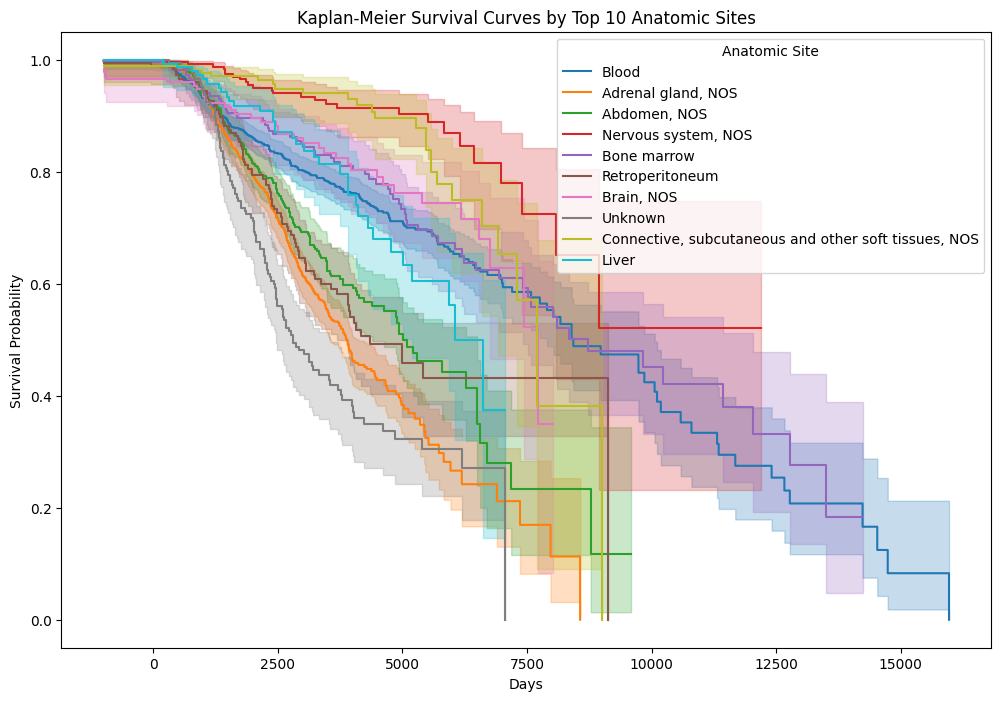

<lifelines.CoxPHFitter: fitted with 3574 total observations, 2400 right-censored observations>
             duration col = 'Age at Last Known Survival Status (days)'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 3574
number of events observed = 1174
   partial log-likelihood = -8448.75
         time fit was run = 2024-08-31 23:46:29 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Age at Diagnosis (days)  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Race                     -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
Ethnicity                 0.40       1.50       0.03             0.35             0.46                 1.42                 1.58
Sex at Birth             -0.00       1.00       0.06            -0.13             0.12                 0.88                 1.13
Diagnosis                 0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Anatomic Site            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                          cmp to      z      p   -log2(p)
covariate                                                
Age at Diagnosis (days)     0.00 -13.20 <0.005     129.68
Race                        0.00  -5.15 <0.005      21.84
Ethnicity                   0.00  14.97 <0.005     165.93
Sex at Birth                0.00  -0.06   0.95       0.08
Diagnosis                   0.00   6.50 <0.005      33.51
Anatomic Site               0.00  -0.33   0.74       0.43
---
Concordance = 0.69
Partial AIC = 16909.50
log-likelihood ratio test = 527.24 on 6 df
-log2(p) of ll-ratio test = 365.23

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'data_lifelines.csv'
data = pd.read_csv(file_path)

# Clean the data by removing rows with NaN values
cleaned_data = data.dropna()

# Prepare data for survival analysis
cleaned_data['Event'] = cleaned_data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)
cleaned_data['Age at Last Known Survival Status (days)'] = cleaned_data['Age at Last Known Survival Status']

# Select top 10 anatomic sites with the most occurrences
top_10_sites = cleaned_data['Anatomic Site'].value_counts().nlargest(10).index

# Kaplan-Meier Analysis for top 10 anatomic sites
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))

for site in top_10_sites:
    mask = cleaned_data['Anatomic Site'] == site
    kmf.fit(durations=cleaned_data[mask]['Age at Last Known Survival Status (days)'], event_observed=cleaned_data[mask]['Event'], label=site)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Top 10 Anatomic Sites')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend(title='Anatomic Site')
plt.savefig('kaplan_meier_by_top_10_anatomic_sites.png')
plt.show()

# Encode categorical variables for Cox Proportional Hazards Model
encoded_data = cleaned_data.copy()
label_encoders = {}
for column in ['Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site']:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le

# Cox Proportional Hazards Model for top 10 anatomic sites
cph = CoxPHFitter()
top_10_encoded_data = encoded_data[encoded_data['Anatomic Site'].isin(label_encoders['Anatomic Site'].transform(top_10_sites))]
cph.fit(top_10_encoded_data[['Age at Diagnosis (days)', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site', 'Age at Last Known Survival Status (days)', 'Event']], 
        duration_col='Age at Last Known Survival Status (days)', event_col='Event')
cph.print_summary()

# Save the summary of Cox regression analysis
cox_summary = cph.summary
cox_summary.to_csv('cox_regression_summary_top_10_anatomic_sites.csv')

In [55]:
#saving Kaplan-Meier model
import joblib
# Save the Kaplan-Meier model
joblib.dump(kmf, 'kaplan_meier_model.pkl')
# Save the CPH model
joblib.dump(cph, 'cph_model.pkl')

['cph_model.pkl']